In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import itertools
sns.set(style="darkgrid")

In [2]:
df1 = pd.read_csv('Jan_2019_ontime.csv', skip_blank_lines = True)
df = df1.fillna(value=0)
replace_values = {'negative':0, 'positive':1}
df = df.replace(to_replace=replace_values)

In [3]:
def attribute_list():
    return list(df)

Accuracy (in percentage) of Random Forest Model:
90.95011001994914
ROC AUC score (this metric measures the probability that a correct label is preferred over an incorrect label):
0.823831622748748
Normalized confusion matrix


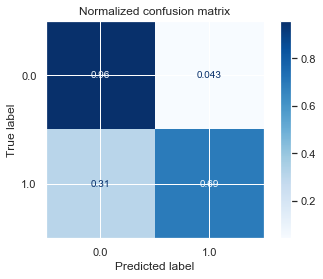

In [9]:
def rand_forest(pred_attr_index, feature_list):
    X = df.iloc[:,feature_list]
    y = df.iloc[:,pred_attr_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
    model = RandomForestClassifier()
    classifier = model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)

    print("Accuracy (in percentage) of Random Forest Model:")
    print(accuracy_score(y_test,y_predicted)*100)
    print("ROC AUC score (this metric measures the probability that a correct label is preferred over an incorrect label):")
    print(roc_auc_score(y_test,y_predicted))

    # Plot normalized confusion matrix
    titles_options = [("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)

feature_list = [0,1,6,13,14,18]
rand_forest(17, feature_list)

Accuracy (in percentage) of K Nearest Neighbors Model
99.84074933431509
ROC AUC score (this metric measures the probability that a correct label is preferred over an incorrect label):
0.9885853147444941
Normalized confusion matrix


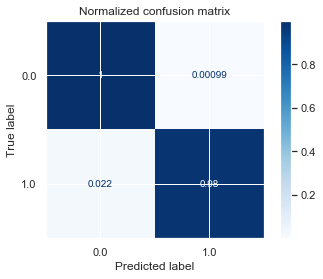

In [6]:
def k_neighbors(pred_attr_index, feature_list):
    X = df.iloc[:,feature_list]
    y = df.iloc[:,pred_attr_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
    model = KNeighborsClassifier()
    classifier = model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    
    print("Accuracy (in percentage) of K Nearest Neighbors Model")
    print(accuracy_score(y_test,y_predicted)*100)
    print("ROC AUC score (this metric measures the probability that a correct label is preferred over an incorrect label):")
    print(roc_auc_score(y_test,y_predicted))

    
    # Plot normalized confusion matrix
    titles_options = [("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)

feature_list = [0,1,6,13,14]
k_neighbors(18, feature_list)

Accuracy (in percentage) of Gaussian Naive Bayes Model
99.71060900536828
ROC AUC score (this metric measures the probability that a correct label is preferred over an incorrect label):
0.9866982215158947
Normalized confusion matrix


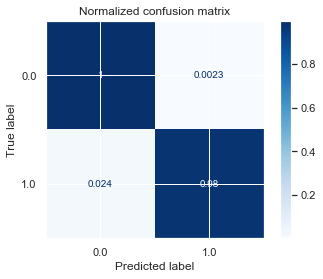

In [7]:
def naive_bayes(pred_attr_index, feature_list):
    X = df.iloc[:,feature_list]
    y = df.iloc[:,pred_attr_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
    model = GaussianNB()
    classifier = model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    
    print("Accuracy (in percentage) of Gaussian Naive Bayes Model")
    print(accuracy_score(y_test,y_predicted)*100)
    print("ROC AUC score (this metric measures the probability that a correct label is preferred over an incorrect label):")
    print(roc_auc_score(y_test,y_predicted))

    # Plot normalized confusion matrix
    titles_options = [("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)

feature_list = [0,1,6,13,14]
naive_bayes(18, feature_list)